### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第70天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/05/29
### 改版日期:  
### 改版備註: 

# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


### ANS:

>兩層效果比一層差

#### 參考資料
[Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ "Display Deep Learning Model Training History in Keras")

[使用 Keras 手把手介绍神经网络构建](http://yangguang2009.github.io/2016/11/27/deeplearning/develop-neural-network-model-with-keras-step-by-step/ "使用 Keras 手把手介绍神经网络构建")

# 資料預處理

In [27]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [28]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [29]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [30]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [31]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
#建立模型

In [34]:
#宣告採用序列模型
model = Sequential()

In [35]:
#建構輸入層(兩層)
for i in range(2):
    model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [36]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [37]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [38]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [39]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.2389 - accuracy: 0.9288 - val_loss: 0.1092 - val_accuracy: 0.9656
Epoch 2/10
48000/48000 [==============================] - 9s 185us/step - loss: 0.0924 - accuracy: 0.9706 - val_loss: 0.0896 - val_accuracy: 0.9729
Epoch 3/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0620 - accuracy: 0.9801 - val_loss: 0.0980 - val_accuracy: 0.9704
Epoch 4/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.0886 - val_accuracy: 0.9750
Epoch 5/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0935 - val_accuracy: 0.9743
Epoch 6/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0984 - val_accuracy: 0.9767
Epoch 7/10
48000/48000 [==============================] - 7s 1

# 以圖形顯示訓練過程

In [40]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.show()

In [41]:
# 列出可以使用的評估指標
print(train_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


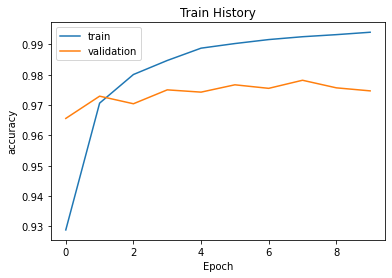

In [42]:

show_train_history(train_history,'accuracy','val_accuracy')

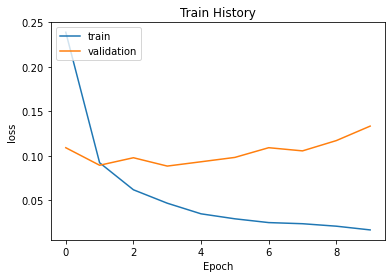

In [43]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [44]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 82us/step

accuracy= 0.9743000268936157
